# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [28]:
import pandas as pd
import numpy as np

# Example synthetic data (replace with your project dataset)
np.random.seed(0)
n = 100
df = pd.DataFrame({
    'income': np.random.normal(60000, 15000, n).astype(int),
    'monthly_spend': np.random.normal(2000, 600, n).astype(int),
    'credit_score': np.random.normal(680, 50, n).astype(int)
})
df.head()

,income,monthly_spend,credit_score
0,86460,3129,661
1,66002,1191,668
2,74681,1237,734
3,93613,2581,712
4,88013,1296,712


In [29]:
data_path = r"/Users/souhil/bootcamp_souhil_khiat/homework/homework9/data/Health_Risk_Dataset.csv"


df2 = pd.read_csv(data_path)

df2.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low


## TODO: Implement at least 2 engineered features here

In [31]:
# Example template:
df['spend_income_ratio'] = df['monthly_spend'] / df['income']  # TODO: Your feature
# Add rationale in markdown below
df2['Shock_Index'] = df2['Heart_Rate'] / df2['Systolic_BP']


### Rationale for Feature 1
Rationale for Feature 1: Shock Index (Heart Rate ÷ Systolic BP)

The Shock Index is a clinically recognized marker of hemodynamic stability.

A higher value indicates tachycardia combined with hypotension, often seen in patients with shock, bleeding, or sepsis.

It is more informative than Heart Rate or Blood Pressure alone because it captures the balance between cardiovascular demand and perfusion.

Including this feature may help the model flag patients at higher risk earlier.

In [ ]:
df2["Respiratory_Oxygen_Ratio"] = df2['Respiratory_Rate'] / df2['Oxygen_Saturation']

### Rationale for Feature 2
Rationale for Feature 2: Respiratory–Oxygen Ratio (Respiratory Rate ÷ Oxygen Saturation)

This ratio reflects the efficiency of breathing relative to oxygenation.

A higher value indicates patients breathing faster despite lower oxygen saturation → possible respiratory failure or hypoxemia.

It combines two signals (rate of breathing and blood oxygenation) into one stress index, helping the model detect early deterioration.

Useful in predicting progression to high risk in respiratory illnesses.

### Optional Plots

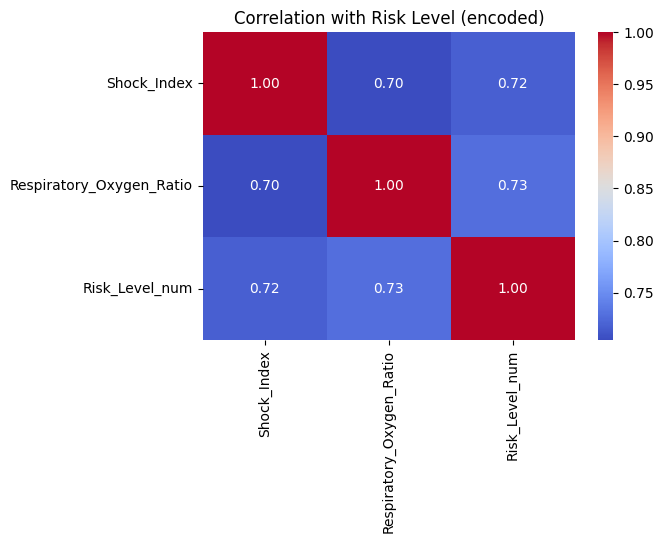

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


mapping = {"Low":0, "Normal":1, "Medium":2, "High":3}
df2["Risk_Level_num"] = df2["Risk_Level"].map(mapping)


# Correlation with engineered features
corrs = df2[["Shock_Index","Respiratory_Oxygen_Ratio","Risk_Level_num"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corrs, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation with Risk Level (encoded)")
plt.show()